## Marketing Analytics Homework 3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines.statistics import proportional_hazard_test
from lifelines import WeibullFitter, ExponentialFitter, LogLogisticFitter, LogNormalFitter
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter, PiecewiseExponentialRegressionFitter
import os
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\Sona\\Desktop\\Homework 3'

In [7]:
telco = pd.read_csv("telco.csv")

In [8]:
telco.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [9]:
telco.set_index('ID', inplace=True)

telco['churn'] = (telco['churn'] == "Yes").astype(int)

encode = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat']

df = pd.get_dummies(telco, columns=encode, prefix=encode, drop_first=True)

df.head()

,tenure,age,address,income,churn,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
ID,,,,,,,,,,,,,,,,,,,,
1,13,44,9,64,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,11,33,7,136,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1
3,68,52,24,116,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
4,33,33,12,33,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
5,23,30,9,30,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0


In [10]:
weibull = WeibullFitter()
exponential = ExponentialFitter()
lognormal = LogNormalFitter()
loglogistic = LogLogisticFitter()

In [11]:
lognormal_aft = LogNormalAFTFitter()
lognormal_aft.fit(df, duration_col='tenure', event_col='churn')
lognormal_aft_pd = lognormal_aft.predict_survival_function(df).transpose()
avg_lognormal = lognormal_aft_pd.mean().to_list()

In [12]:
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(df, duration_col='tenure', event_col='churn')
weibull_aft_pd = weibull_aft.predict_survival_function(df).transpose()
avg_weibull = weibull_aft_pd.mean().to_list()

In [13]:
loglogistic_aft = LogLogisticAFTFitter()
loglogistic_aft.fit(df, duration_col='tenure', event_col='churn')
loglogistic_aft_pd = loglogistic_aft.predict_survival_function(df).transpose()
avg_loglogistic = loglogistic_aft_pd.mean().to_list()

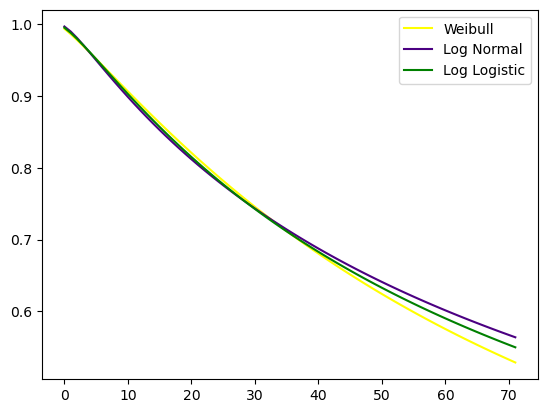

In [14]:
plt.plot(avg_weibull, color = "yellow", label = "Weibull")
plt.plot(avg_lognormal, color = "indigo", label = "Log Normal")
plt.plot(avg_loglogistic, color = 'green', label = 'Log Logistic')
plt.legend()
plt.show()

In [15]:
for model in [weibull, exponential, lognormal, loglogistic]:
    model.fit(durations = df["tenure"], event_observed = df["churn"])
    print(f"AIC for {model.__class__.__name__} is {model.AIC_}")

AIC for WeibullFitter is 3216.8611706815464
AIC for ExponentialFitter is 3215.9608134637247
AIC for LogNormalFitter is 3209.0351474316735
AIC for LogLogisticFitter is 3214.4154757933375


### The LogNormalFitter has the lowest AIC value so we'll consider it the best model in this case.

In [16]:
lognormal_aft.print_summary()  

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-11-30 19:33:36 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

### The p-values that are less than 0.05 have high impact so let's create new dataset with significant features. 

In [17]:
new = df[["tenure", "churn", "address", "age", "custcat_E-service", "custcat_Plus service", "custcat_Total service", "internet_Yes", "marital_Unmarried", "voice_Yes"]]

In [18]:
new

,tenure,churn,address,age,custcat_E-service,custcat_Plus service,custcat_Total service,internet_Yes,marital_Unmarried,voice_Yes
ID,,,,,,,,,,
1,13,1,9,44,0,0,0,0,0,0
2,11,1,7,33,0,0,1,0,0,1
3,68,0,24,52,0,1,0,0,0,0
4,33,1,12,33,0,0,0,0,1,0
5,23,0,9,30,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
996,10,0,0,39,0,0,0,0,1,0
997,7,0,2,34,0,0,0,0,1,0
998,67,0,40,59,0,0,1,1,1,1


In [19]:
lognormal_aft = LogNormalAFTFitter()
lognormal_aft.fit(new, duration_col='tenure', event_col='churn')
lognormal_pred = lognormal_aft.predict_survival_function(new)
lognormal_pred

ID,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
1.0,0.999688,0.999736,0.999999,0.997985,0.999870,0.999934,0.996781,0.993548,0.999994,0.999997,...,0.999828,0.999961,0.999668,1.000000,0.999781,0.996036,0.995073,0.999991,0.999923,0.999471
2.0,0.998129,0.998378,0.999988,0.990703,0.999127,0.999519,0.986180,0.975242,0.999946,0.999965,...,0.998883,0.999699,0.998022,0.999998,0.998622,0.983532,0.980236,0.999915,0.999446,0.997040
3.0,0.995250,0.995831,0.999956,0.979723,0.997635,0.998631,0.971075,0.951403,0.999818,0.999879,...,0.997036,0.999113,0.995004,0.999992,0.996407,0.966176,0.960211,0.999724,0.998443,0.992790
4.0,0.991268,0.992267,0.999893,0.966472,0.995448,0.997273,0.953528,0.925327,0.999593,0.999724,...,0.994377,0.998186,0.990846,0.999979,0.993269,0.946364,0.937776,0.999396,0.996923,0.987122
5.0,0.986400,0.987874,0.999796,0.951860,0.992655,0.995483,0.934724,0.898616,0.999264,0.999491,...,0.991029,0.996934,0.985782,0.999957,0.989366,0.925411,0.914381,0.998926,0.994934,0.980384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68.0,0.595597,0.612735,0.941530,0.380751,0.681995,0.740246,0.324647,0.244165,0.887519,0.906396,...,0.655478,0.780519,0.588828,0.975035,0.631761,0.300058,0.274774,0.864845,0.727282,0.537869
69.0,0.591329,0.608517,0.940235,0.376567,0.678061,0.736667,0.320700,0.240726,0.885403,0.904544,...,0.651418,0.777252,0.584544,0.974386,0.627607,0.296244,0.271117,0.862440,0.723614,0.533498
70.0,0.587113,0.604347,0.938937,0.372457,0.674164,0.733115,0.316829,0.237363,0.883290,0.902692,...,0.647400,0.774006,0.580311,0.973732,0.623498,0.292507,0.267537,0.860042,0.719976,0.529186
71.0,0.582946,0.600224,0.937635,0.368420,0.670304,0.729590,0.313033,0.234073,0.881180,0.900841,...,0.643423,0.770779,0.576130,0.973074,0.619433,0.288845,0.264031,0.857649,0.716367,0.524932


In [20]:
lognormal_aft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-11-30 19:34:40 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.78
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

In [21]:
sequence = range(1,len(lognormal_pred.columns)+1)
MM = 1300
r = 0.1

for num in sequence:
    lognormal_pred.loc[:,num] = lognormal_pred.loc[:,num]/((1+r/12)**(sequence[num-1]-1))

In [22]:
lognormal_pred["CLV"] = MM * lognormal_pred.sum(axis = 1)
telco["CLV"] = lognormal_pred.CLV
telco

,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
ID,,,,,,,,,,,,,,,
1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,1,156861.102087
2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,1,155786.222466
3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,0,154377.529302
4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,1,152804.003928
5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,0,151151.448627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Zone 3,10,39,Unmarried,0,27,Some college,No,Female,No,No,No,Basic service,0,NaN
997,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,No,Female,No,No,No,Basic service,0,NaN
998,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,No,Female,Yes,Yes,Yes,Total service,0,NaN


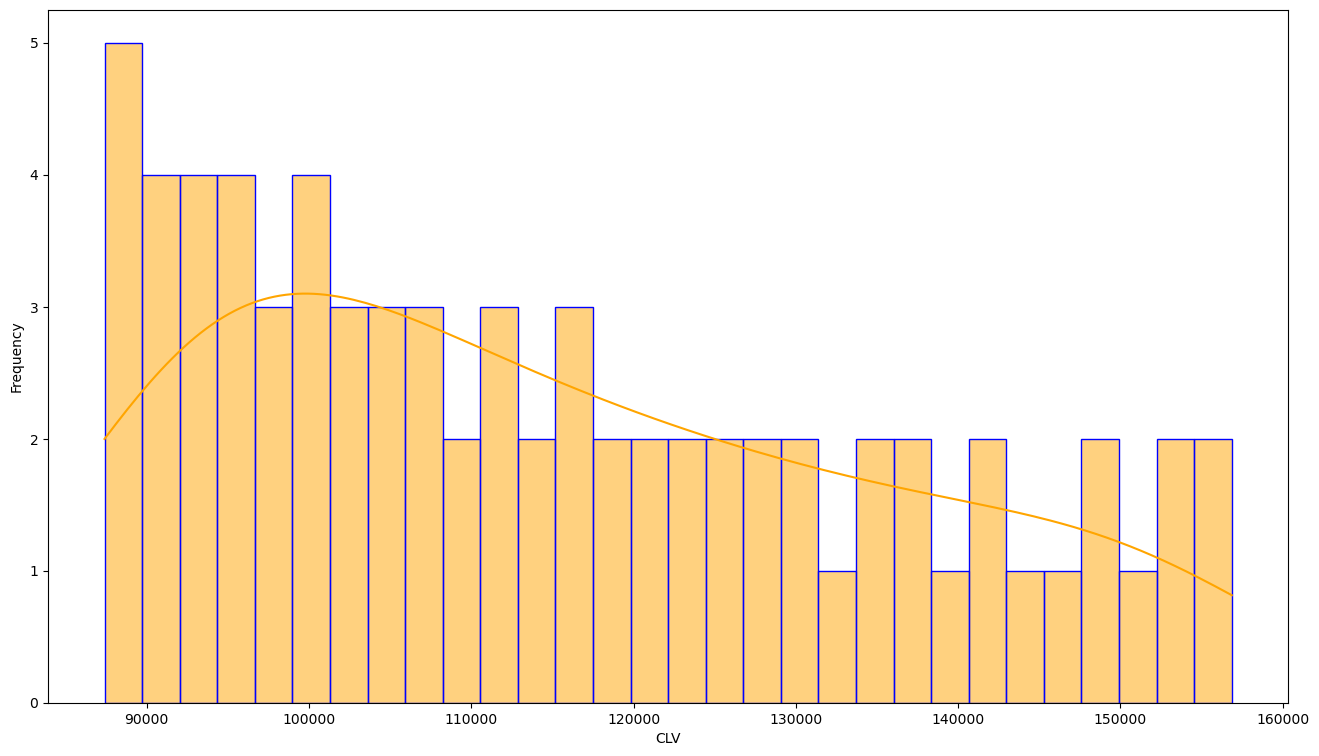

In [23]:
plt.figure(figsize=(16, 9))
sns.histplot(telco['CLV'], bins=30, kde=True, color='orange', edgecolor='blue')
plt.xlabel('CLV')
plt.ylabel('Frequency')

plt.show()

## Valuable segments

In [24]:
valuable = telco[(telco['churn'] == 0) & (telco['CLV'] > telco['CLV'].mean())]
print(valuable.head())

    region  tenure  age    marital  address  income  \
ID                                                    
3   Zone 3      68   52    Married       24     116   
5   Zone 2      23   30    Married        9      30   
6   Zone 2      41   39  Unmarried       17      78   
8   Zone 2      38   35  Unmarried        5      76   
9   Zone 3      45   59    Married        7     166   

                              ed retire  gender voice internet forward  \
ID                                                                       
3   Did not complete high school     No  Female    No       No      No   
5   Did not complete high school     No    Male    No       No     Yes   
6             High school degree     No  Female    No       No      No   
8             High school degree     No    Male   Yes      Yes     Yes   
9                 College degree     No    Male    No       No     Yes   

          custcat  churn            CLV  
ID                                       
3    Plus s

# At risk customers

In [25]:
at_risk = telco[(telco['tenure'] <= 12) & (telco['churn'] == 1)]
survival_probabilities = lognormal_pred.loc[:, at_risk.index]
adjusted_clv = at_risk['CLV'] * survival_probabilities.mean(axis=0)

In [26]:
annual_retention_budget = adjusted_clv.sum()
round(annual_retention_budget, 2)

461726.84

# Coefficient interpretations

In [27]:
lognormal_aft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-11-30 19:34:40 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.78
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

Positive coefficients (greater than 0) are associated with an increase in the hazard of churn for the following variables: 'address,' 'age,' 'custcat_E-service,' 'custcat_Plus service,' and 'custcat_Total service.' 

For instance, as 'address' or 'age' values increase, the risk of churn tends to rise. Longer customer tenure ('address') and older age ('age') may foster loyalty, but these same customers could also be more resistant to change or less interested in new offerings, making them more likely to churn. What about E-service, these Customers are more inclined to explore new options because they greatly rely on electronics. Plus service customers most possibly have higher expectations and are more careful about the quality of the product. Total service customers are not picky about the options, they would choose any, but in return again expect the value to be returned.

Negative coefficients are associated with a decrease in the hazard for 'internet_Yes,' 'marital_Unmarried,' and 'voice_Yes.' which means these factors affect on not staying with the company and not churning.